# Plotting diphthongs
First, we import some standard numeric and plotting libraries, and set some basic defaults to apply to all following plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(16, 9))  # make plots wider
plt.rc('font', size=16)            # make text bigger

Since vowel plots are pretty specialized, let's write a reusable function that will put our axes on the top and right sides, and invert the axis directions.  We'll do this with a function called `garnish` that can be applied to any plot.

In [2]:
def garnish(ax):
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.set_xlabel('F2')
    ax.set_ylabel('F1')
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right')
    ax.set_xlim(2800, 600)
    ax.set_ylim(1100, 100)
    return ax

## Lit review
Here's what some studies in the literature have done:

In [3]:
pd.read_csv('lit-review.csv')

,study,language,number of data points,where
0,"Collier, Bell-Berti, and Raphael 1983",Dutch,3,"“onset”, “midpoint”, “offset”"
1,Clermont 1993,Australian English,varied,"10 ms. intervals (F1, F2, F3) (and onset, offs..."
2,Bohn 2004,Fering (North Frisian),3,"25, 50, 75%"
3,Clark and Hillenbrand 2007,English,2,"25, 75%"
4,Tsukada 2008,English,varied,5 ms. intervals
5,Oxley 2009,English [aɪ],3,"20, 50, 80%"
6,Tasko and Greilick 2010,English [aɪ],varied (measured); 2 (plotted),10 ms. intervals; “transition onset…and offset”
7,Maxwell and Fletcher 2010,Indian English,2,“point of least formant change” for each vowel...
8,Ferragne and Pellegrino 2010,English,13 / 2 (measured / plotted),"0-100%, equally spaced; plotted 2/13 and 11/13"
9,Mayr and Davies 2011,Welsh (real and non-words),5,"20, 35, 50, 65, 80%"


## Load the data

In [4]:
formant_data = pd.read_csv('diphthongs-bVd.csv')
formant_data.head()

,filename,ipa,pct,time,formant,formant_value
0,bayed1_11.wav,eɪ,5%,0.142887,f1,392.126407
1,bayed1_11.wav,eɪ,5%,0.142887,f2,1974.868555
2,bayed1_11.wav,eɪ,10%,0.157283,f1,415.304088
3,bayed1_11.wav,eɪ,10%,0.157283,f2,2183.584071
4,bayed1_11.wav,eɪ,15%,0.171679,f1,390.060387


## Data cleaning
After loading the data, we notice that the `pct` column is strings. It would be easier if they were numbers (for sorting purposes), so let's convert them. Let's also reshape the data from "long format" (1 formant measurement per line) into "wide format" (1 record per line).  The way we do this will have the side effect of dropping the `time` values (which we don't need anyway).  The resulting table will have "heirarchical indexes" on both the columns and rows, which will make it easy to select whole spans of rows or columns at a time.

In [5]:
formant_data['pct'] = formant_data['pct'].map(lambda x: int(x.strip('%')))
wide_data = pd.pivot_table(formant_data, index=['ipa', 'filename'],
                           columns=['formant', 'pct'], values='formant_value')
wide_data.head(10)

formant                    f1                                                  \
pct                        5           10          15          20          25   
ipa filename                                                                    
aɪ  bide1_11.wav   524.317639  638.345806  669.792534  647.291859  620.689151   
    bide2_11.wav   561.453755  669.974209  669.117605  646.659876  625.967057   
    bide3_11.wav   537.821226  658.059614  687.582390  646.571564  606.330113   
    bide4_11.wav   500.586653  664.438934  689.781012  667.474467  634.002638   
aʊ  bowed1_11.wav  524.260967  597.629803  685.148716  708.567593  732.234526   
    bowed2_11.wav  549.032218  654.590947  699.747260  721.145980  737.622352   
    bowed3_11.wav  649.661471  731.419841  744.468371  743.313052  748.532686   
    bowed4_11.wav  619.432014  718.318074  735.906634  772.589078  731.225687   
eɪ  bayed1_11.wav  392.126407  415.304088  390.060387  386.776217  372.464079   
    bayed2_11.wav  433.203170  411.769538  405.075065  403.637329  387.175039   

formant                                                                        \
pct                        30          35          40          45          50   
ipa filename                                                                    
aɪ  bide1_11.wav   601.123950  628.920610  646.989850  656.115924  668.025798   
    bide2_11.wav   629.095971  690.470011  695.102389  718.213584  713.742269   
    bide3_11.wav   607.496244  638.290651  683.164783  678.642096  674.753000   
    bide4_11.wav   667.438946  670.649500  681.086793  678.556100  671.458869   
aʊ  bowed1_11.wav  754.902264  748.861624  733.548357  687.453027  657.745514   
    bowed2_11.wav  706.541662  690.494358  661.145261  603.680617  621.682789   
    bowed3_11.wav  737.213899  704.618321  677.254795  646.711350  655.058148   
    bowed4_11.wav  718.824929  743.476031  767.524416  722.736455  687.943628   
eɪ  bayed1_11.wav  368.170358  360.833322  349.904209  341.619097  336.408633   
    bayed2_11.wav  355.524823  355.809837  352.352451  336.914815  331.297249   

formant               ...                f2                            \
pct                   ...                50           55           60   
ipa filename          ...                                               
aɪ  bide1_11.wav      ...       1420.179160  1500.899016  1597.470227   
    bide2_11.wav      ...       1363.998853  1499.941698  1593.604579   
    bide3_11.wav      ...       1384.501988  1440.625834  1558.930320   
    bide4_11.wav      ...       1347.528196  1432.314913  1527.564842   
aʊ  bowed1_11.wav     ...       1291.833138  1253.209279  1221.670281   
    bowed2_11.wav     ...       1388.008783  1356.618596  1285.544537   
    bowed3_11.wav     ...       1347.563369  1263.800348  1192.953679   
    bowed4_11.wav     ...       1327.773336  1293.449268  1227.498026   
eɪ  bayed1_11.wav     ...       2573.300641  2594.447583  2611.780417   
    bayed2_11.wav     ...       2611.633579  2651.046592  2646.782353   

formant                                                                \
pct                         65           70           75           80   
ipa filename                                                            
aɪ  bide1_11.wav   1748.956914  1868.008169  2020.079333  2111.394395   
    bide2_11.wav   1702.731227  1831.491451  2016.975302  2167.456642   
    bide3_11.wav   1728.756227  1800.193221  1929.492132  2060.066165   
    bide4_11.wav   1678.343891  1727.179415  1850.554445  1942.132958   
aʊ  bowed1_11.wav  1207.318639  1191.534974  1170.480739  1165.297040   
    bowed2_11.wav  1209.857602  1172.713337  1150.072561  1158.035693   
    bowed3_11.wav  1144.034046  1121.259721  1118.547520  1133.698340   
    bowed4_11.wav  1175.975180  1122.782629  1107.760710  1102.849690   
eɪ  bayed1_11.wav  2590.720448  2579.132821  2542.685144  2560.215123   
    bayed2_11.wav  2651.452132  2625.804195  2608.987007  2550.322

it will be useful for later to have the IPA labels in both the table index *and* in their own column, so let's do that now. While we're at it, let's remove the heirarchical index names (`formant`, `pct`, etc), so our software doesn't get confused between the `ipa` column and the `ipa` sequence of row labels. Finally, for obscure reasons, indexing works best if the top level of heirarchical column names is in alphabetic order, so we'll do that now too.

In [6]:
idx = wide_data.index
wide_data.reset_index(0, inplace=True, col_level=0)
wide_data.index = idx
wide_data.columns.rename(['', ''], inplace=True)
wide_data.index.rename(['', ''], inplace=True)
wide_data = wide_data[['f1', 'f2', 'ipa']]  # sort top-level
wide_data.head()

f1                                                  \
                           5          10          15          20          25   
                                                                               
aɪ bide1_11.wav   524.317639  638.345806  669.792534  647.291859  620.689151   
   bide2_11.wav   561.453755  669.974209  669.117605  646.659876  625.967057   
   bide3_11.wav   537.821226  658.059614  687.582390  646.571564  606.330113   
   bide4_11.wav   500.586653  664.438934  689.781012  667.474467  634.002638   
aʊ bowed1_11.wav  524.260967  597.629803  685.148716  708.567593  732.234526   

                                                                              \
                          30          35          40          45          50   
                                                                               
aɪ bide1_11.wav   601.123950  628.920610  646.989850  656.115924  668.025798   
   bide2_11.wav   629.095971  690.470011  695.102389  718.213584  713.742269   
   bide3_11.wav   607.496244  638.290651  683.164783  678.642096  674.753000   
   bide4_11.wav   667.438946  670.649500  681.086793  678.556100  671.458869   
aʊ bowed1_11.wav  754.902264  748.861624  733.548357  687.453027  657.745514   

                 ...           f2                                         \
                 ...           55           60           65           70   
                 ...                                                       
aɪ bide1_11.wav  ...  1500.899016  1597.470227  1748.956914  1868.008169   
   bide2_11.wav  ...  1499.941698  1593.604579  1702.731227  1831.491451   
   bide3_11.wav  ...  1440.625834  1558.930320  1728.756227  1800.193221   
   bide4_11.wav  ...  1432.314913  1527.564842  1678.343891  1727.179415   
aʊ bowed1_11.wav ...  1253.209279  1221.670281  1207.318639  1191.534974   

                                                                      \
                           75           80           85           90   
                                                                       
aɪ bide1_11.wav   2020.079333  2111.394395  2204.389031  2348.650643   
   bide2_11.wav   2016.975302  2167.456642  2239.524958  2392.208980   
   bide3_11.wav   1929.492132  2060.066165  2047.478549  2126.514370   
   bide4_11.wav   1850.554445  1942.132958  2069.292663  2457.170883   
aʊ bowed1_11.wav  1170.480739  1165.297040  1189.667891  1298.157696   

                              ipa  
                           95      
                                   
aɪ bide1_11.wav   2411.960969  aɪ  
   bide2_11.wav   2448.126283  aɪ  
   bide3_11.wav   2406.484776  aɪ  
   bide4_11.wav   2484.979420  aɪ  
aʊ bowed1_11.wav  1331.373081  aʊ  

[5 rows x 39 columns]

While we're munging data, let's add a column for color, and make the color the same for each instance of a given diphthong. Then we'll show an example of heirarchical indexing at work:

In [7]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_mapping = dict(zip(wide_data['ipa'].unique(), colors))
wide_data['color'] = wide_data['ipa'].replace(color_mapping)

# example of heirarchical indexing:
wide_data.loc[['aʊ', 'oʊ'], [('ipa', ''), ('color', ''), ('f1', 50), ('f2', 50)]]

ipa    color          f1           f2
                                       50           50
                                                      
aʊ bowed1_11.wav  aʊ  #ff7f0e  657.745514  1291.833138
   bowed2_11.wav  aʊ  #ff7f0e  621.682789  1388.008783
   bowed3_11.wav  aʊ  #ff7f0e  655.058148  1347.563369
   bowed4_11.wav  aʊ  #ff7f0e  687.943628  1327.773336
oʊ bode1_11.wav   oʊ  #d62728  458.270960  1115.600734
   bode2_11.wav   oʊ  #d62728  456.993529  1097.735479
   bode3_11.wav   oʊ  #d62728  452.832597  1075.327613
   bode4_11.wav   oʊ  #d62728  460.553409  1143.393218

## Plotting
Let's write a reusable function that will plot the vowels' IPA symbols instead of points.

In [8]:
def plot_vowel(f1, f2, vowel, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    ax.text(f2, f1, vowel, ha='center', va='center', **kwargs)
    ax = garnish(ax)
    return ax

For starters, let's plot just the midpoint of each vowel, like we would do with monophthongs. We could do it all at once with a command like this:
```python
plot_vowels(wide_data[('f1', 50)], wide_data[('f2', 50)], wide_data['ipa'])
```

but it would be nicer if the color was the same for each token of the same diphthong.  So we'll use a for-loop to do that:

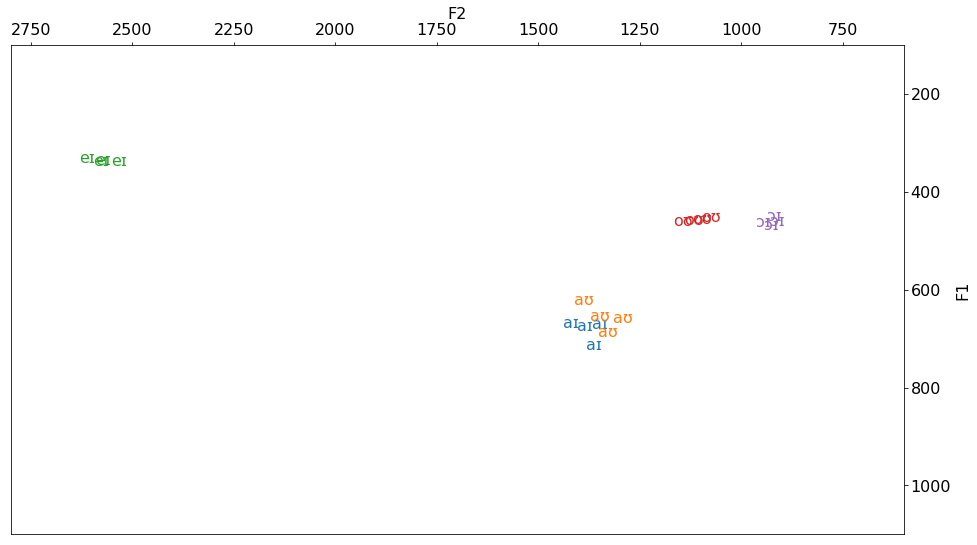

In [9]:
fig, ax = plt.subplots()
for row in wide_data[[('f1', 50), ('f2', 50),
                      ('ipa', ''), ('color', '')]].itertuples(index=False):
    plot_vowel(row[0], row[1], row[2], color=row[3], ax=ax);

### Plotting 2 points (but which two?)
Now let's pick 2 timepoints in each diphthong. We'll want to connect the start- and end-points with a line, so we'll need a new plotting function.

In [10]:
def plot_diphthong(f1, f2, vowel, ax=None, **kwargs):
    '''f1 and f2 should be matrices, where each column is one diphthong,
       with later timepoints at higher row numbers'''
    f1 = np.array(f1)
    f2 = np.array(f2)
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(f2, f1, **kwargs, linestyle='-', marker='o', markersize=3)
    ax = plot_vowel(f1[0], f2[0], vowel, ax=ax)
    ax = garnish(ax)
    return ax

We could pick the `20%` and `80%` points, or `30%`-`70%`, or `10%`-`90%`... which is best?

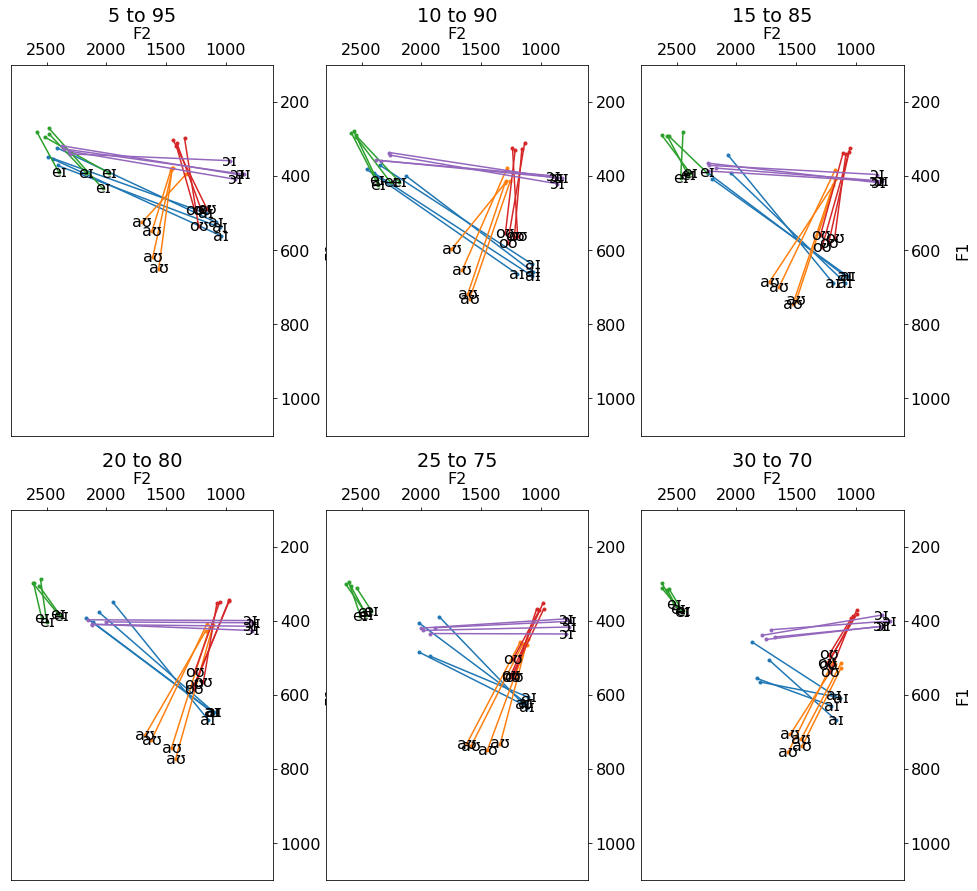

In [11]:
pairs = [[5, 95], [10, 90], [15, 85], [20, 80], [25, 75], [30, 70]]

fig, axs = plt.subplots(2, 3, figsize=(16, 15))
for pair, ax in zip(pairs, axs.ravel()):
    f1 = wide_data[[('f1', pair[0]), ('f1', pair[1])]]
    f2 = wide_data[[('f2', pair[0]), ('f2', pair[1])]]
    for this_f1, this_f2, ipa, color in zip(f1.values, f2.values,
                                            wide_data['ipa'],
                                            wide_data['color']):
        ax = plot_diphthong(this_f1, this_f2, ipa, color=color, ax=ax)
    ax.set_title('{} to {}'.format(*pair), y=1.1);

Looking at the red traces for oʊ, notice that the `30-70%` lines go up and to the right, whereas the `5-95%` lines go up and to the left.  Let's plot several spans of just that vowel to get a closer look:

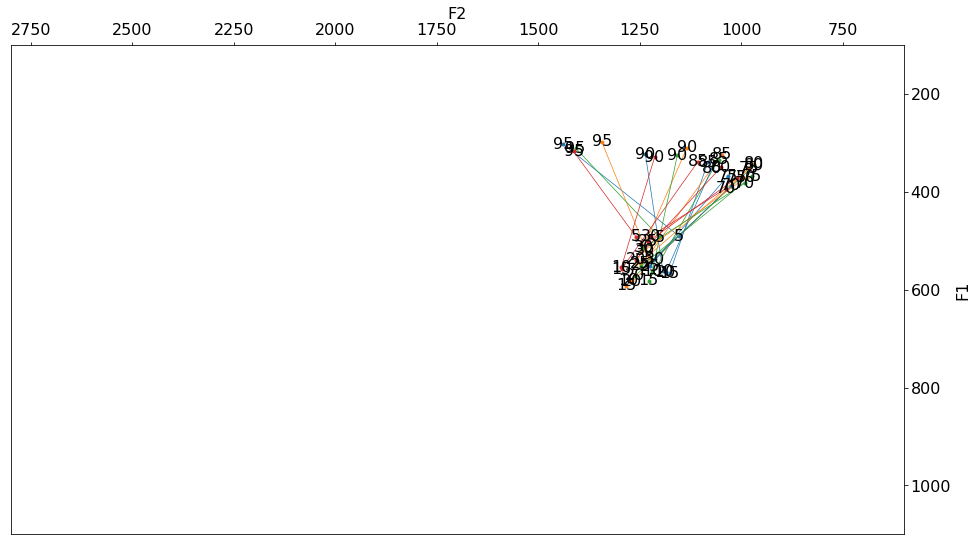

In [12]:
ou = wide_data.loc['oʊ', ['f1', 'f2', 'ipa', 'color']]

fig, ax = plt.subplots()
for pair in pairs:
    for f1, f2, color in zip(ou[[('f1', pair[0]), ('f1', pair[1])]].values,
                             ou[[('f2', pair[0]), ('f2', pair[1])]].values,
                             colors):
        ax = plot_diphthong(f1, f2, pair[0], ax=ax, color=color, linewidth=0.7)
        ax = plot_vowel(f1[-1], f2[-1], pair[1], ax=ax);

This plot is a little crowded, but should make clear that you would have a very different impression of the direction of formant movement if you picked `30-70%` vs. `10-90%` or `5-95%`.  We can plot the whole time course to get the full picture:

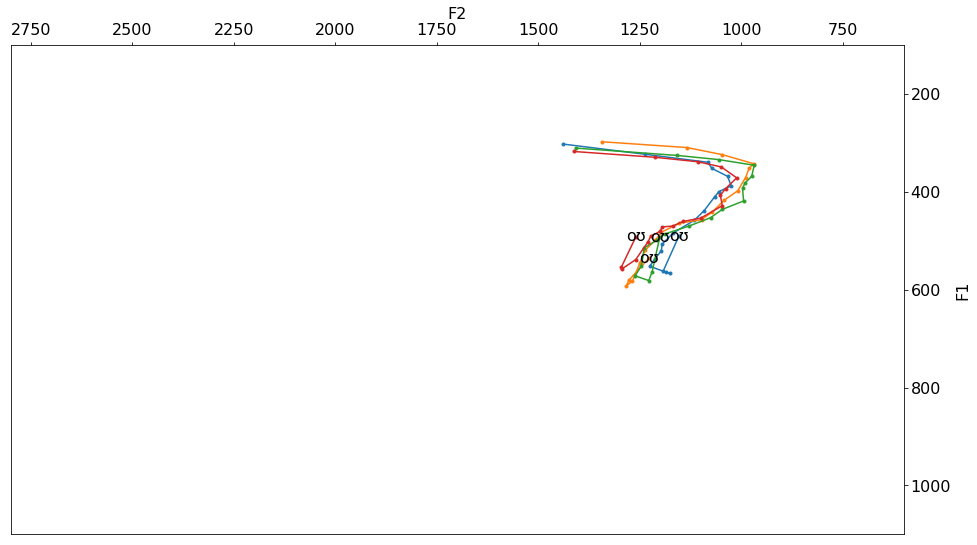

In [13]:
fig, ax = plt.subplots()
for f1, f2, ipa, color in zip(ou['f1'].values, ou['f2'].values,
                              ou['ipa'], colors):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color);

Presumably all that fronting toward the end of the vowel is due to the following `/d/` consonant, but we can check the spectrogram just to be sure. The `scipy` and `matplotlib` modules both have spectrogram functions built in, but here we'll define a wrapper function that lets us use praat-style parameters like dynamic range in dB and window size in seconds (rather than in samples).

In [14]:
from scipy.io import wavfile
from matplotlib.colors import LogNorm

def draw_spectrogram(x, fs, window_dur=0.005, step_dur=None, dyn_range=70, 
                     cmap=None, ax=None):
    from scipy.signal import spectrogram, gaussian
    # set default for step_dur, if unspecified
    if step_dur is None:
        step_dur = window_dur / np.sqrt(np.pi) / 8.
    # convert window & step durations to numbers of samples
    window_nsamp = int(window_dur * fs * 2)
    step_nsamp = int(step_dur * fs)
    # compute the window
    window_sigma = (window_nsamp + 1) // 6
    window = gaussian(window_nsamp, window_sigma)
    # other arguments to compute spectrogram
    noverlap = window_nsamp - step_nsamp
    kwargs = dict(noverlap=noverlap, window=window, nperseg=window_nsamp, fs=fs)
    freqs, times, power = spectrogram(x, detrend=False, mode='psd', 
                                      scaling='density', **kwargs)
    # create the figure
    if ax is None:
        fig, ax = plt.subplots()
    # default colormap
    if cmap is None:
        cmap = plt.get_cmap('Greys')
    # other arguments to the figure
    extent = (times.min(), times.max(), freqs.min(), freqs.max())
    p_ref = 20e-3  # 20 micropascals
    dB_max = 10 * np.log10(power.max() / p_ref)
    vmin = p_ref * 10 ** ((dB_max - dyn_range) / 10)
    ax.imshow(power, origin='lower', aspect='auto', cmap=cmap,
              norm=LogNorm(), extent=extent, vmin=vmin, vmax=None)
    return ax

We'll use the `wavio` module to import the audio file (`scipy` also has a function `scipy.io.wavfile.read()`, but it can't handle audio with 24 bits per sample).

In [15]:
import wavio
wav = wavio.read('audio/bVd/bowed1_11.wav')
wav_data = np.squeeze(wav.data)
sampling_frequency = wav.rate

Now to plot the spectrogram:

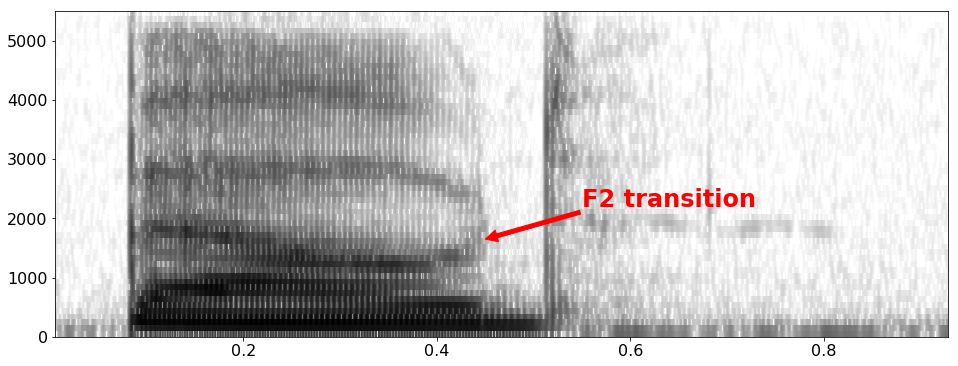

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = draw_spectrogram(wav_data, sampling_frequency, ax=ax)
# draw an arrow
ax.annotate('F2 transition', xy=(0.45, 1650), xytext=(0.55, 2200),
            color='r', fontsize=24, fontweight='bold',
            arrowprops=dict(facecolor='r', edgecolor='r'));

Yep, looks like that raising of F2 is all right at the end, where we'd expect to see the effect of the following consonant.

Let's see what happens when we plot all the points for all the vowels.  For good measure, let's average the tokens together, and add a mean track for each vowel type:

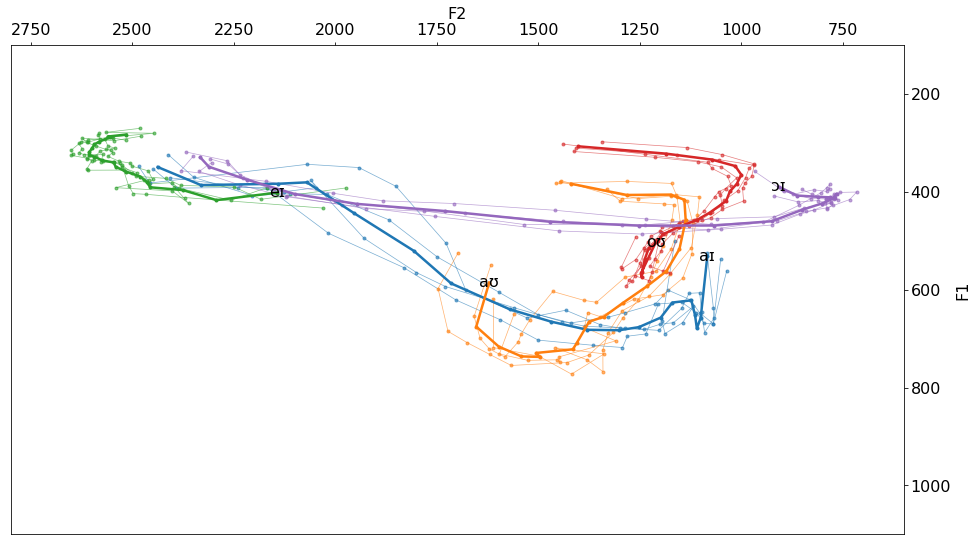

In [17]:
means = wide_data[['f1', 'f2', 'ipa']].groupby('ipa').aggregate('mean')
blank_labels = [''] * wide_data.shape[0]

fig, ax = plt.subplots()
for f1, f2, ipa, color in zip(wide_data['f1'].values, wide_data['f2'].values,
                              blank_labels, wide_data['color']):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color, alpha=0.6, linewidth=0.7);

for f1, f2, ipa, color in zip(means['f1'].values, means['f2'].values,
                              means.index, colors):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color, linewidth=2.5);

Nice, but a little messy...  let's try smoothing with a moving average of length 3. When we do this, we lose the endpoints (5% and 95%) because there's nothing before/after them to average them with, so we'll remove those points.

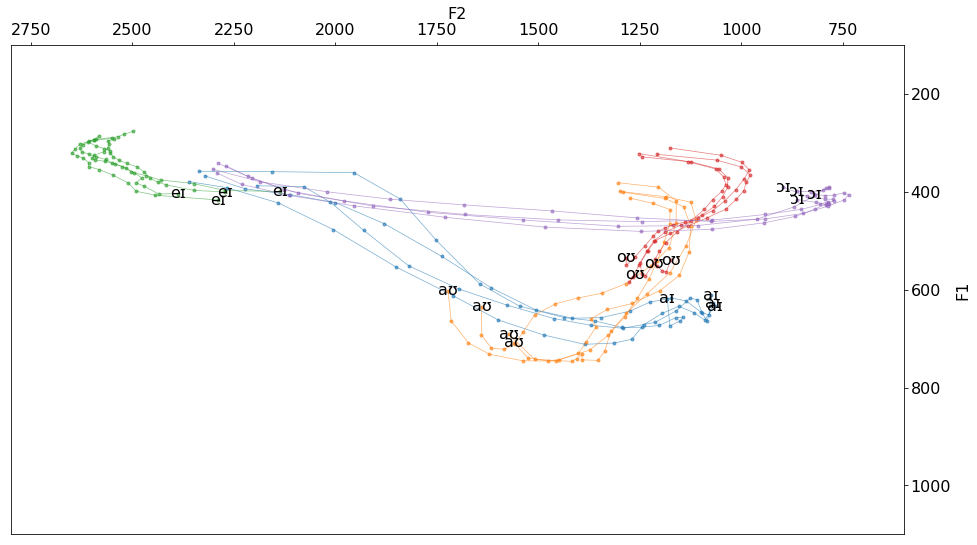

In [18]:
rolled = wide_data[['f1', 'f2']].rolling(axis=1, window=3, min_periods=3,
                                         center=True, win_type='boxcar').mean()
rolled['ipa'] = wide_data['ipa']
nan_columns = [(f, p) for p in (5, 95) for f in ('f1', 'f2')]
rolled.drop(nan_columns, axis=1, inplace=True)

fig, ax = plt.subplots()
for f1, f2, ipa, color in zip(rolled['f1'].values, rolled['f2'].values,
                              rolled['ipa'], wide_data['color']):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color, alpha=0.6, linewidth=0.7);

## Issues to watch out for
Our data was fairly clean, but that won't always be the case.  Let's load some data from /hVd/ tokens from the same talker.

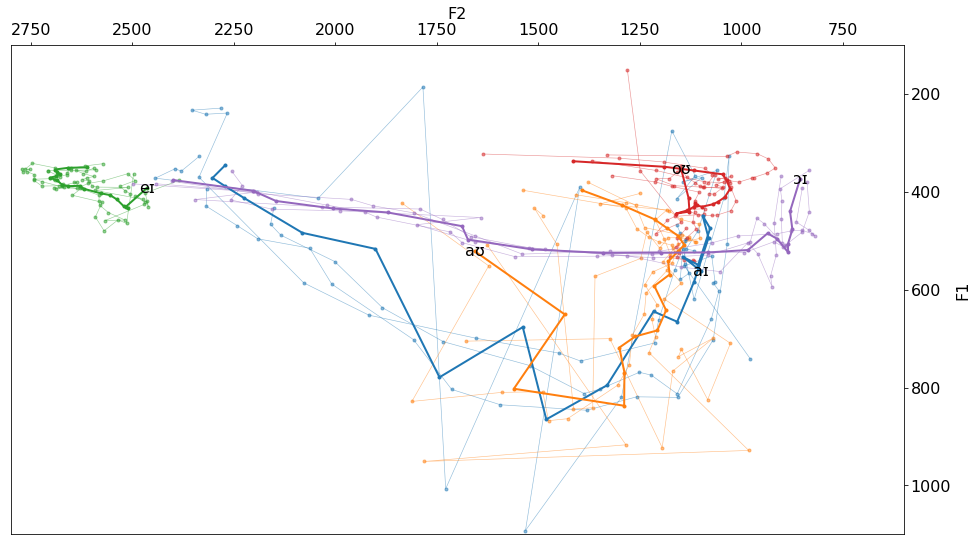

In [19]:
# read in the data
formant_data_hvd = pd.read_csv('diphthongs-hVd.csv')
# convert percentage strings to numbers
formant_data_hvd['pct'] = formant_data_hvd['pct'].map(lambda x: int(x.strip('%')))
# convert long to wide format
wide_data_hvd = pd.pivot_table(formant_data_hvd, index=['ipa', 'filename'],
                               columns=['formant', 'pct'], values='formant_value')
idx = wide_data_hvd.index
wide_data_hvd.reset_index(0, inplace=True, col_level=0)
wide_data_hvd.index = idx
wide_data_hvd.columns.rename(['', ''], inplace=True)
wide_data_hvd.index.rename(['', ''], inplace=True)
wide_data_hvd = wide_data_hvd[['f1', 'f2', 'ipa']]  # sort top-level
wide_data_hvd['color'] = wide_data_hvd['ipa'].replace(color_mapping)
# suppress labels for each token
blank_labels = [''] * wide_data_hvd.shape[0]

# plot tokens
fig, ax = plt.subplots()
for f1, f2, color, ipa in zip(wide_data_hvd['f1'].values,
                              wide_data_hvd['f2'].values,
                              wide_data_hvd['color'],
                              blank_labels):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color, alpha=0.5, linewidth=0.6)

# plot means
means_hvd = wide_data_hvd[['f1', 'f2', 'ipa']].groupby('ipa').aggregate('mean')
for f1, f2, ipa, color in zip(means_hvd['f1'].values,
                              means_hvd['f2'].values,
                              means_hvd.index, colors):
    ax = plot_diphthong(f1, f2, ipa, ax=ax, color=color, linewidth=2);

## Experimental
Another popular way of summarizing lots of tokens is to plot a ribbon showing the standard deviation around each data point.  Since these plots are not true functions, mathematically speaking (i.e., they turn back on themselves in the horizontal direction), this is actually rather trickier than we might think:

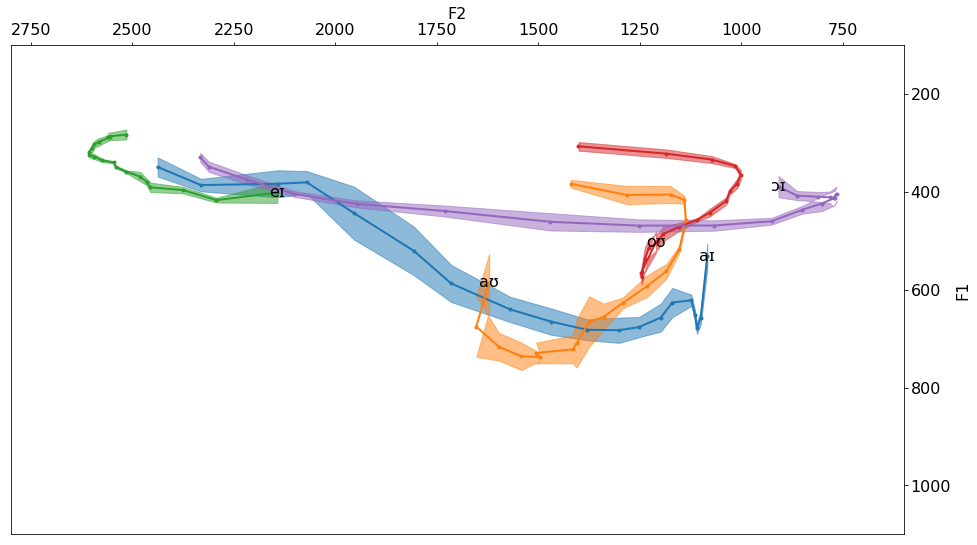

In [20]:
std_devs = wide_data[['f1', 'f2', 'ipa']].groupby('ipa').aggregate('std')
lo = means[['f1', 'f2']] - std_devs[['f1', 'f2']]
hi = means[['f1', 'f2']] + std_devs[['f1', 'f2']]

fig, ax = plt.subplots()
for f1_l, f1_h, f2_m, color in zip(lo['f1'].values, hi['f1'].values,
                                   means['f2'].values, colors):
    ax.fill_between(f2_m, f1_l, f1_h, color=color, alpha=0.5)
    
for f1, f2, ipa, color in zip(means['f1'].values, means['f2'].values,
                              means.index, colors):
    plot_diphthong(f1, f2, ipa, ax=ax, color=color, linewidth=2);